<a href="https://colab.research.google.com/github/XXEERROOXX/IAyRN/blob/main/PIA_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### xxxxxxx **IMPORTACION** DE *BIBLIOTECAS* xxxxxxx

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
from google.colab import files
import zipfile
import os

In [ ]:
uploaded = files.upload()  # Selecciona tu dataset.zip


Saving dataset.zip to dataset.zip


In [ ]:
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rutas
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Augmentación de datos moderada
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Tamaño de lote más balanceado
batch_size = 16

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# CNN optimizada
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 clases
])

# Compilación
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ⏱ Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Entrenamiento
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=test_generator,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Found 1150 images belonging to 5 classes.
Found 158 images belonging to 5 classes.
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.2120 - loss: 1.6898 - val_accuracy: 0.3734 - val_loss: 1.6024 - learning_rate: 2.0000e-04
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.4003 - loss: 1.5399 - val_accuracy: 0.5190 - val_loss: 1.2749 - learning_rate: 2.0000e-04
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.4616 - loss: 1.3266 - val_accuracy: 0.5570 - val_loss: 1.2080 - learning_rate: 2.0000e-04
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.4712 - loss: 1.2298 - val_accuracy: 0.5696 - val_loss: 1.1719 - learning_rate: 2.0000e-04
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.4995 - loss: 1.2157 - val_accuracy: 0.6329 - val_loss: 1.1119 - learning_rate: 2.0000e-04
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.4926 - loss: 1.2009 - val_accuracy: 0.6519 - val_loss: 1.0893 - learning_rate

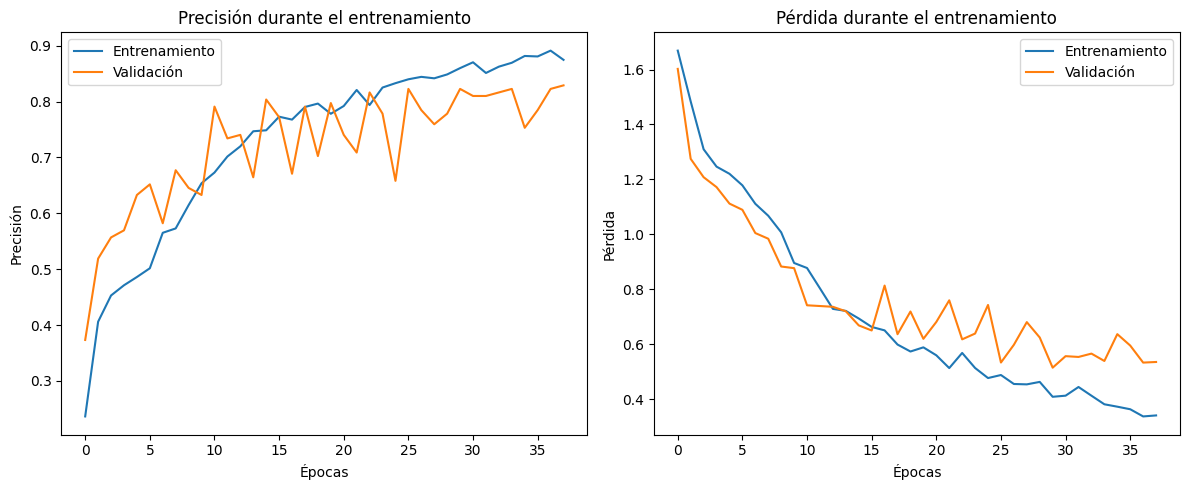

In [ ]:
import matplotlib.pyplot as plt
# Gráfica de precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save("mi_modelo2.0.h5")  # Guarda en formato HDF5


In [ ]:
from google.colab import files
files.download("mi_modelo2.0.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>